In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd

from pathlib import Path
import os, sys
# Load StarCraft2Sensor stuff
ipynb_dir = os.path.dirname(os.path.realpath("__file__"))
model_dir = os.path.join(ipynb_dir, 'models')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
sys.path.append(os.path.join(ipynb_dir, '..'))  # Needed for import below

from sc2sensor.dataset import SensorCIFAR10
from sc2sensor.dataset import LABELS_DICT, DEFAULT_10, ID_TO_RACE, MAP_NAME_TO_ID
from sc2sensor.utils.image_utils import imshow


root = '/local/scratch/a/shared/starcraft_shared'
subdir = 'starcraft-sensor-dataset'
model_root_dir = Path('models')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Map + Binary  (Begining/End game)

In [2]:
# grab the first 5 maps
SUBMAP_NAMES_TO_ID = {name: 2*mid if mid <= 4 else None for name, mid in MAP_NAME_TO_ID.items()}

# Label func
def map_plus_begin_end_game(smd):
    # Input is single metadata row as pandas row
    # Output is target_label (e.g., string) and target_id (e.g., 0-9)
    map_id = SUBMAP_NAMES_TO_ID[smd['static.game_info.map_name']]
    is_end = (smd['dynamic.window_idx'] / smd['dynamic.num_windows']) > 0.5
    if map_id is not None:
        target_id = map_id + is_end  # int + True == int + 1 and int + False == int
        target_label = (smd['static.game_info.map_name'], 'End' if is_end else 'Begining')
    else:
        target_id = pd.NA
        target_label = pd.NA

    return target_label, target_id

    
# Probably takes forever right now because it's add target_labels/ids to every row 
#  (can do this before caching metadata for efficiency)
dataset = SensorCIFAR10(root, subdir=subdir, train=False, label_func=map_plus_begin_end_game, 
                        use_cache=False, transform=transforms.ToTensor()) 

Using cached CSV metadata


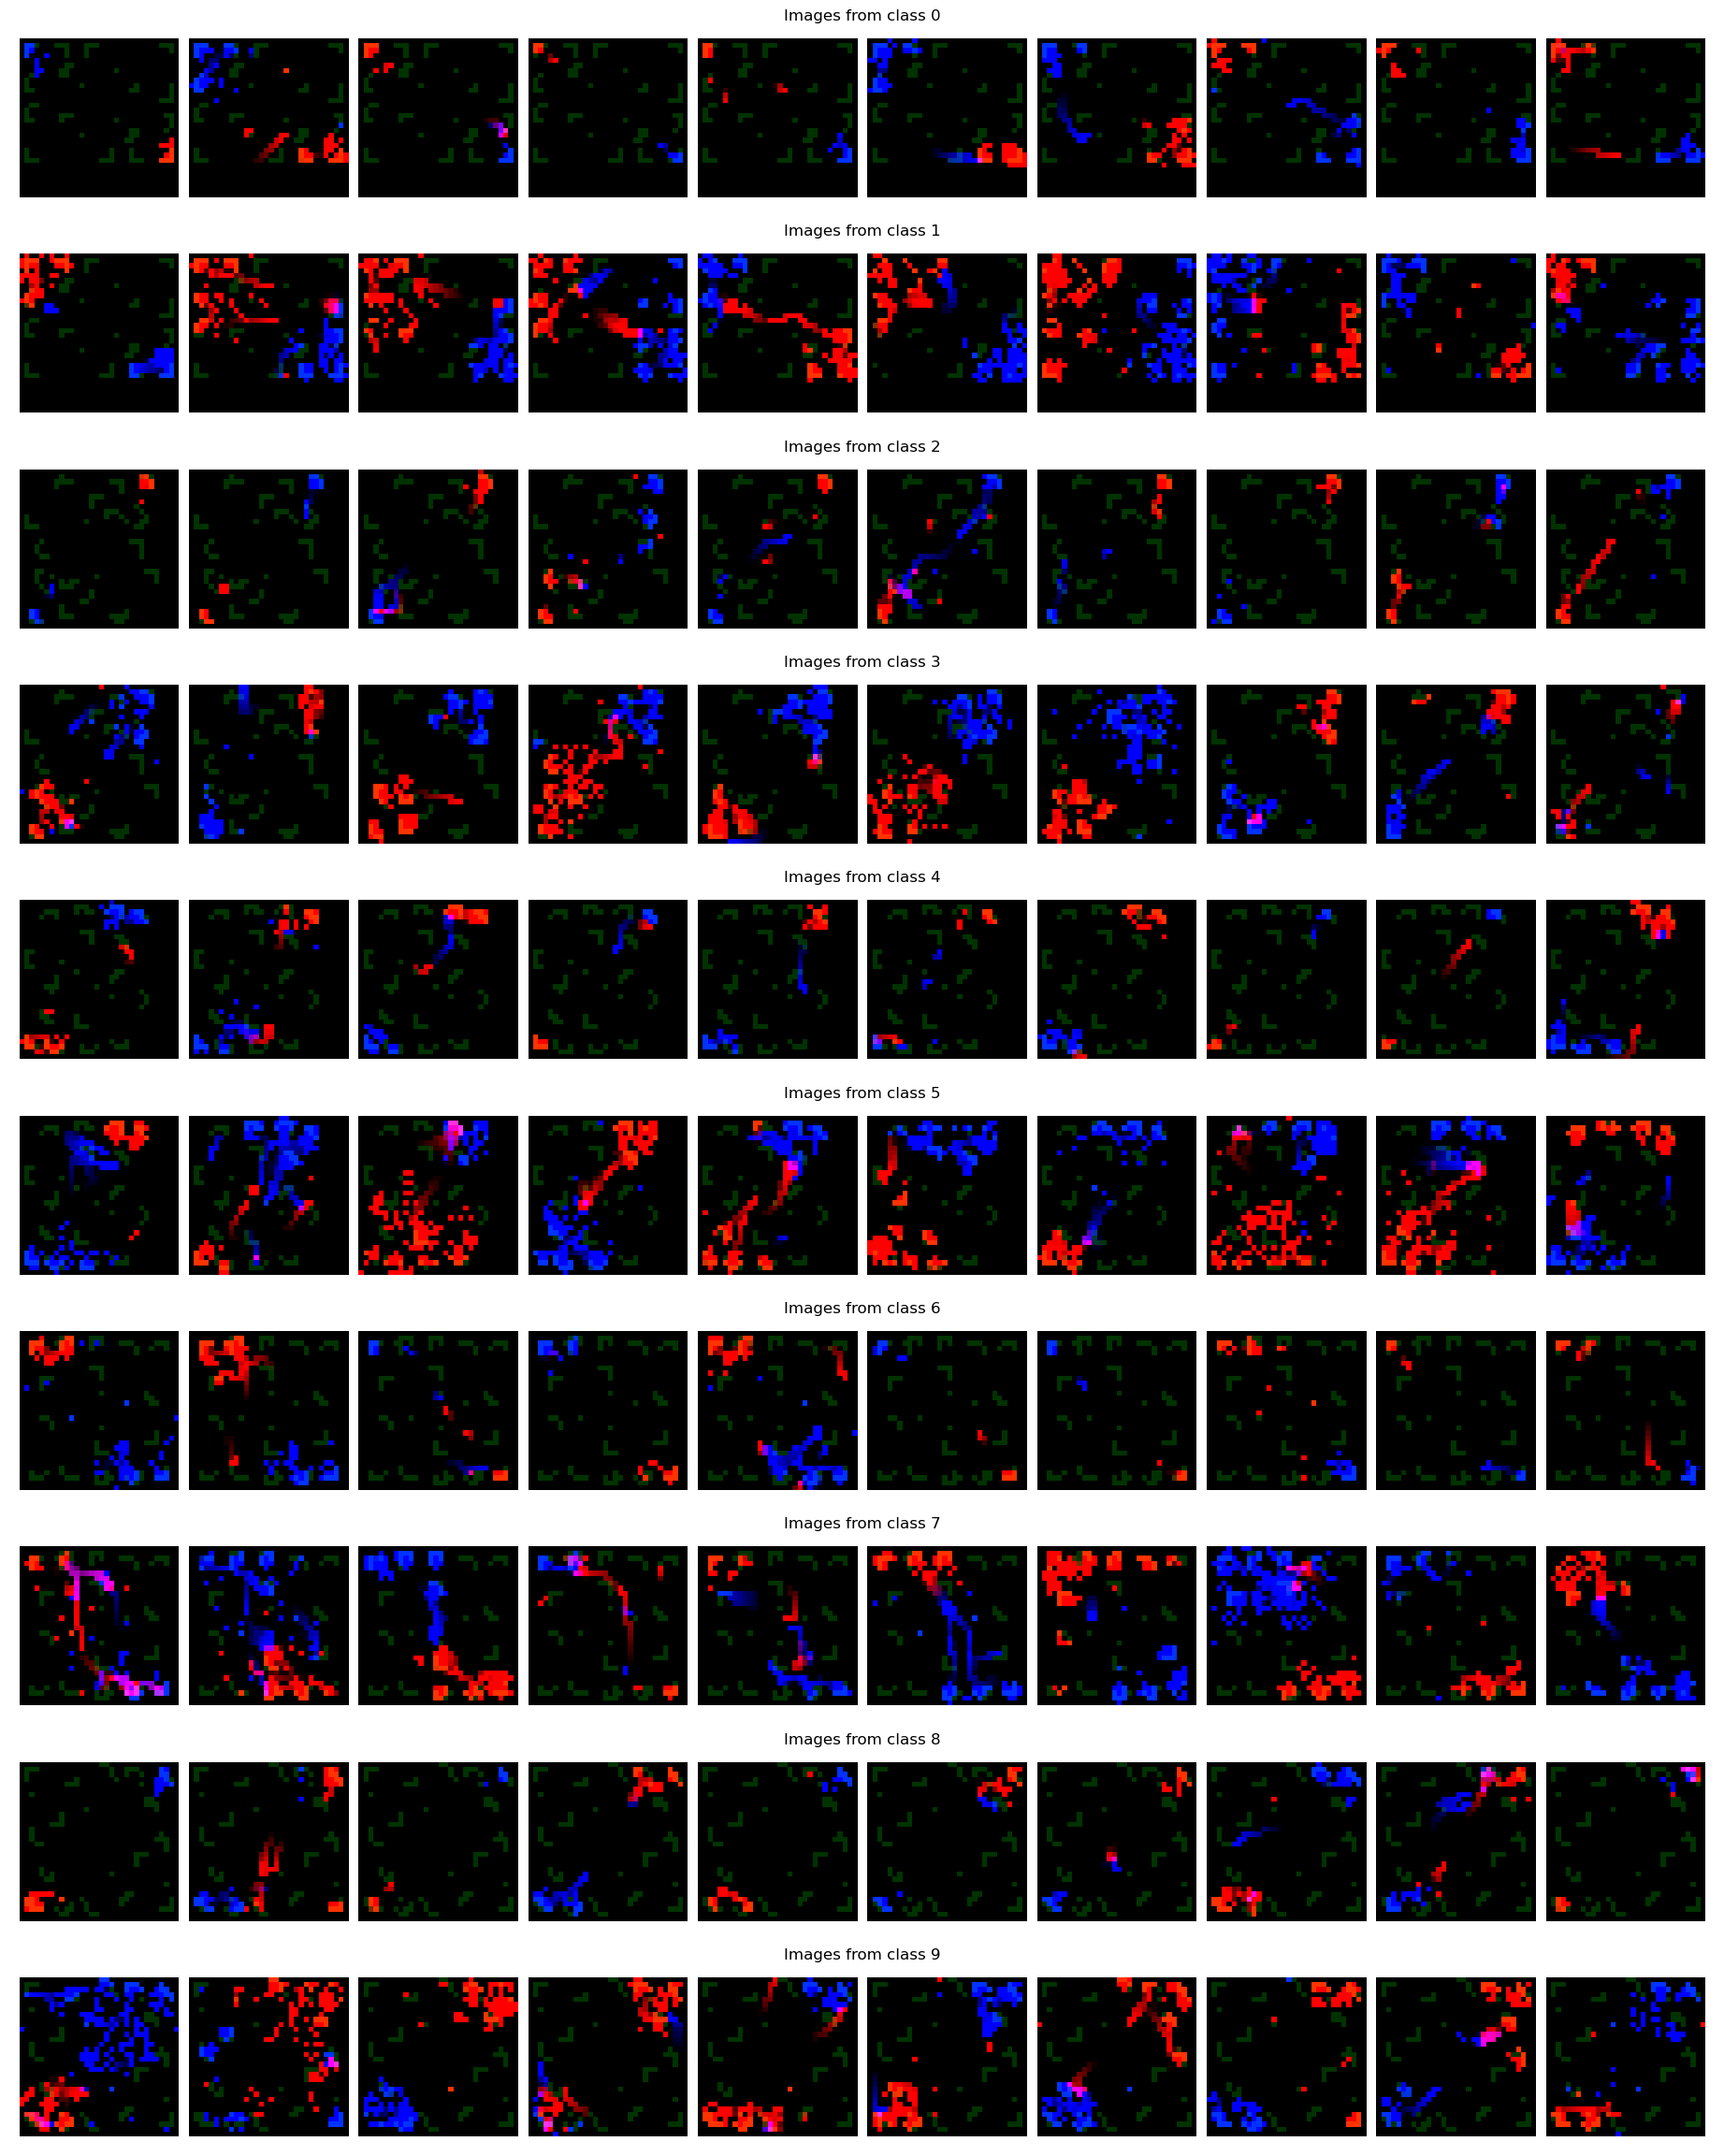

In [3]:
import matplotlib.pyplot as plt
n_classes = 10
n_show = 10 

dataloader = torch.utils.data.DataLoader(dataset, batch_size=n_show*n_classes*2, shuffle=False)
batch = next(iter(dataloader))

fig, axes = plt.subplots(n_classes, 1, figsize=np.array([n_show*6, n_classes*6])*0.5, dpi=100)
for yy, ax in enumerate(axes):
    im_grid = torchvision.utils.make_grid([x for x, y in zip(batch[0], batch[1]) if y==yy][:n_show], nrow=n_show, pad_value=1)
    imshow(im_grid, title=f'Images from class {yy}', ax=ax)
    ax.grid(False)
    ax.set_axis_off()

# 9 racesWIN + NotWin

In [4]:
# Label func
NINE_WIN_CLASSES = tuple([i for i in LABELS_DICT['all'] if i[-1] != 'NotWin'])
def nine_race_win_one_nonwin(smd):
    # Input is single metadata row as pandas row
    # Output is target_label (e.g., string) and target_id (e.g., 0-9)
    if smd['static.replay_info.player_stats.player_1.result'] != 'Win':
        target_id = 9
        target_label = ('NotWin', )
    else:
        target_label = (ID_TO_RACE[smd['static.game_info.player_info.player_1.race_actual']],
                        ID_TO_RACE[smd['static.game_info.player_info.player_2.race_actual']],
                        'Win')
        target_id = NINE_WIN_CLASSES.index(target_label)
    return target_label, target_id
        
    
    
    perc_played = smd['dynamic.window_idx'] / smd['dynamic.num_windows']
    target_id = int(np.floor(perc_played * 10))
    target_label = f'{target_id*10}%-{(target_id+1)*10}%'
    return target_label, target_id
    
# Probably takes forever right now because it's add target_labels/ids to every row 
#  (can do this before caching metadata for efficiency)
dataset = SensorCIFAR10(root, subdir=subdir, train=False, label_func=nine_race_win_one_nonwin, 
                        use_cache=False, transform=transforms.ToTensor()) 

Using cached CSV metadata


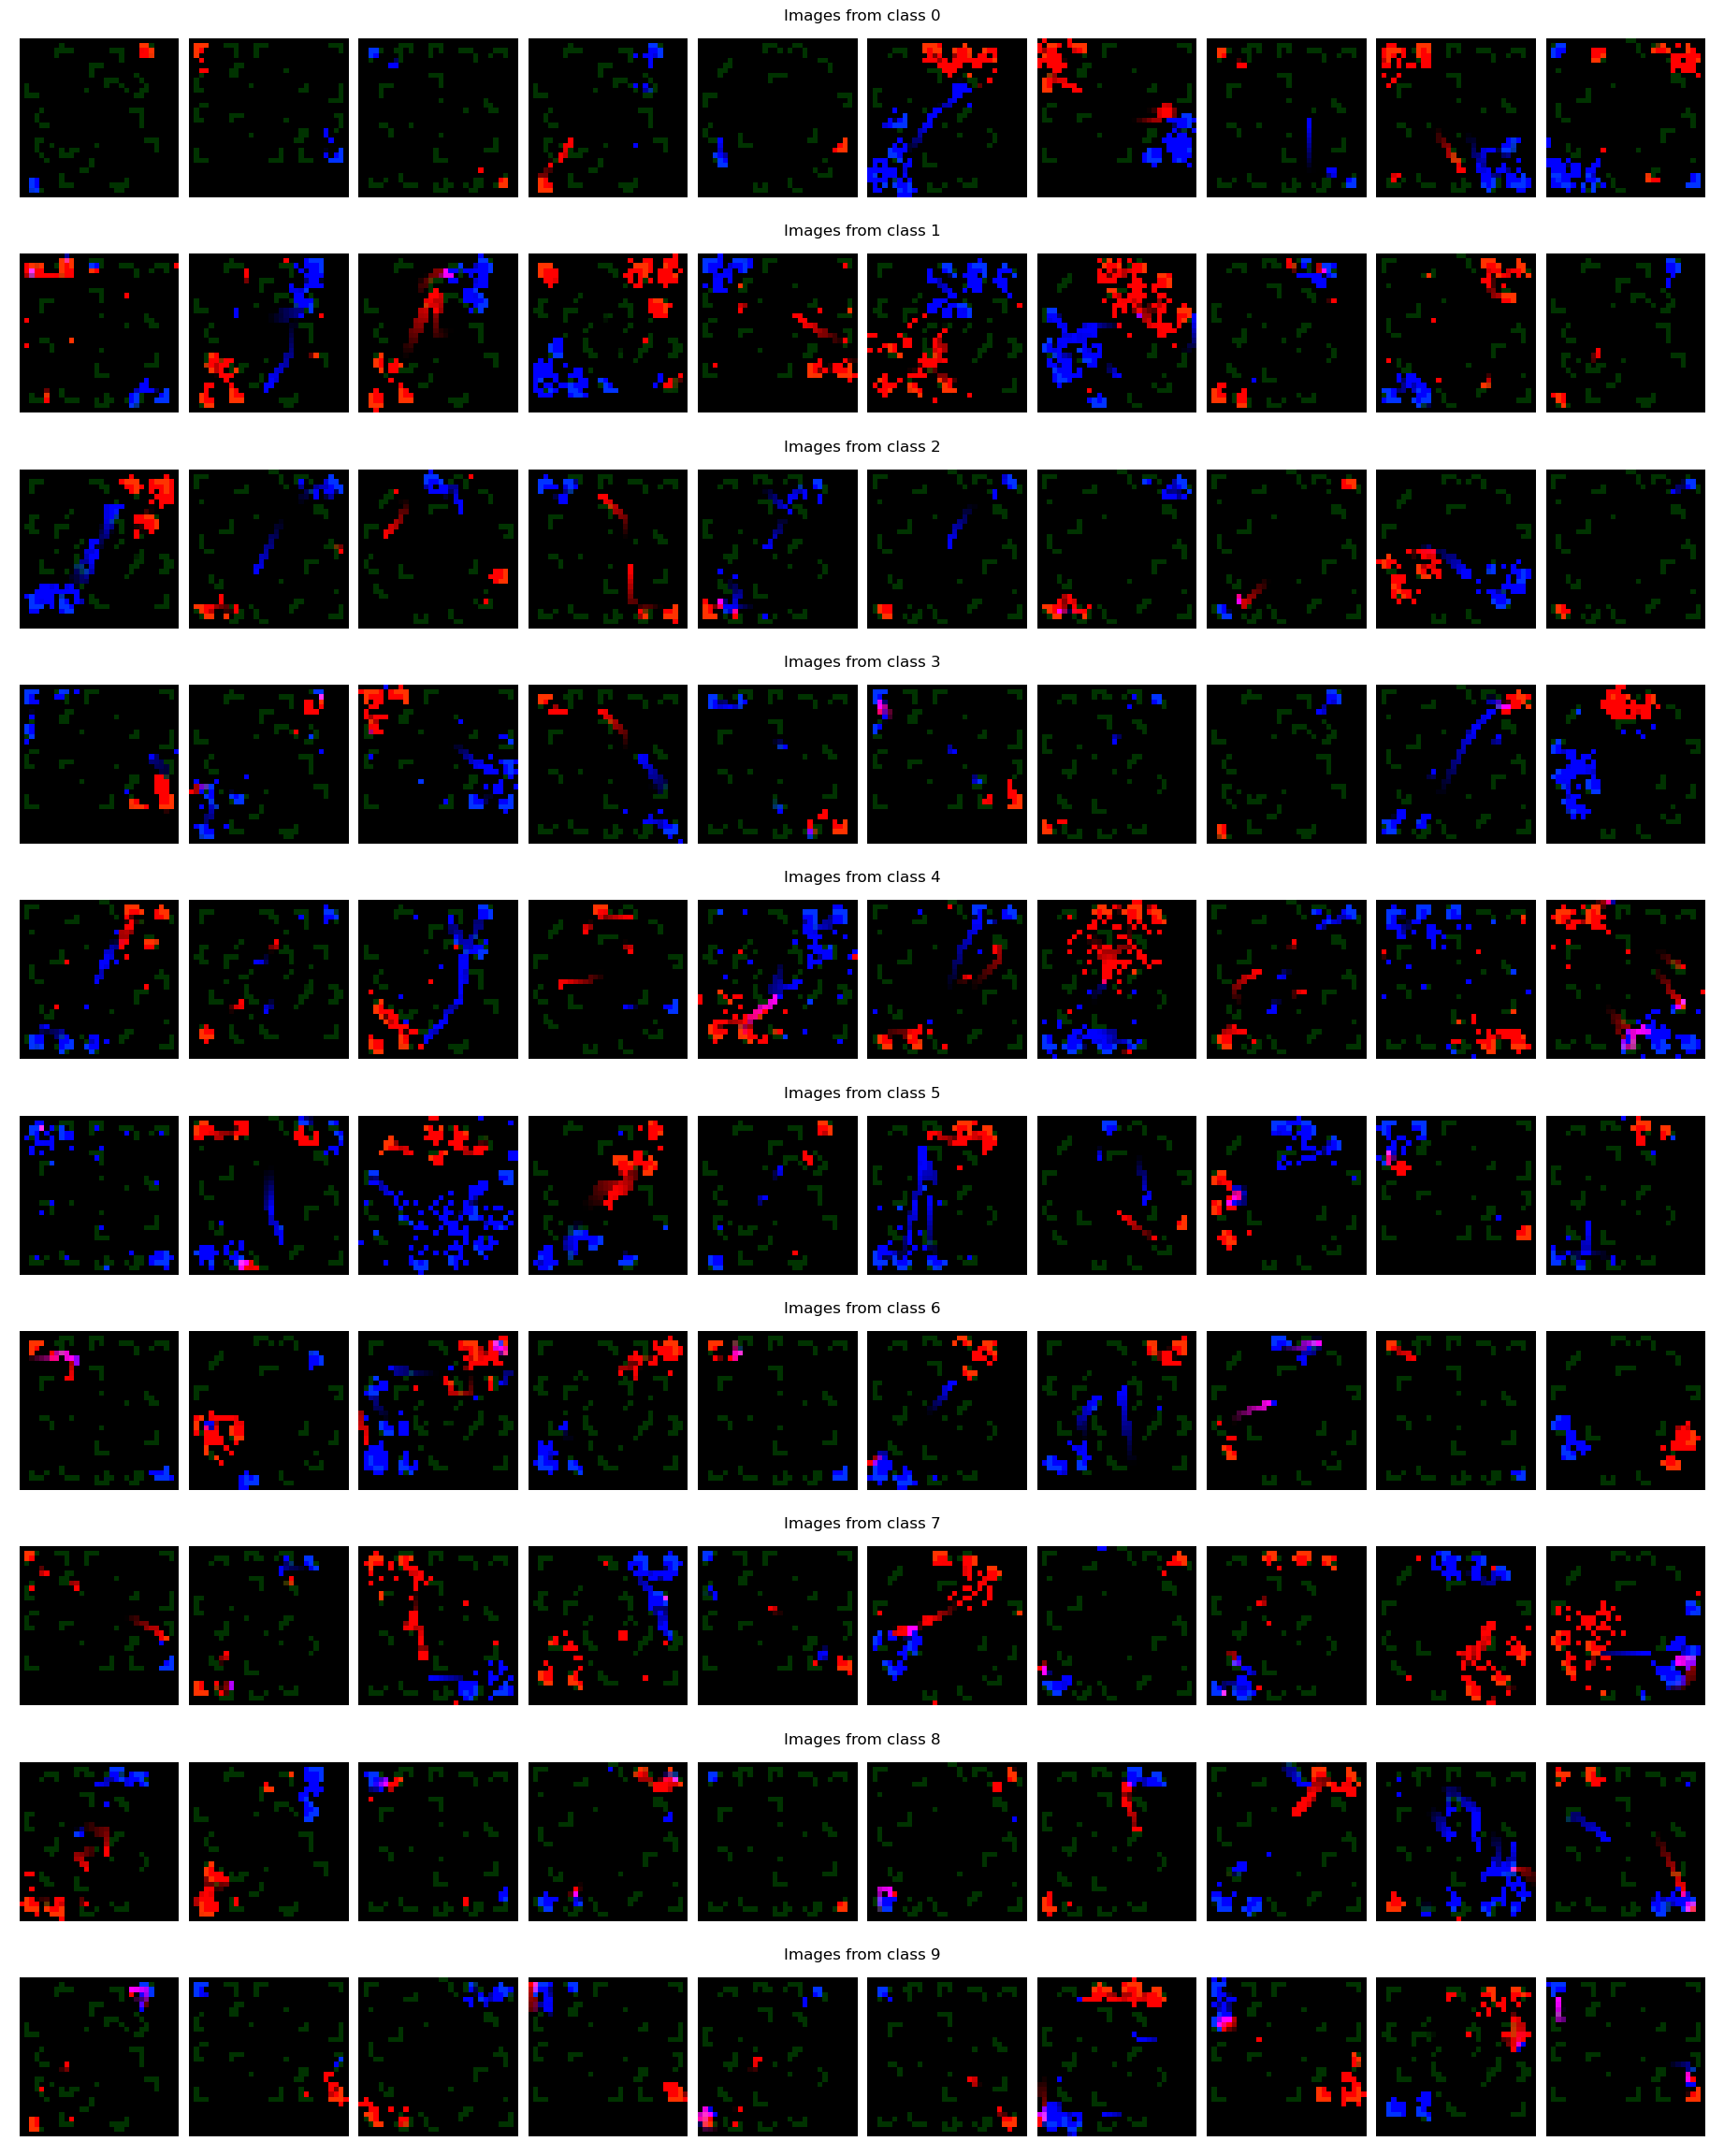

In [5]:
import matplotlib.pyplot as plt
n_classes = 10
n_show = 10 

dataloader = torch.utils.data.DataLoader(dataset, batch_size=n_show*n_classes*2, shuffle=False)
batch = next(iter(dataloader))

fig, axes = plt.subplots(n_classes, 1, figsize=np.array([n_show*6, n_classes*6])*0.5, dpi=100)
for yy, ax in enumerate(axes):
    im_grid = torchvision.utils.make_grid([x for x, y in zip(batch[0], batch[1]) if y==yy][:n_show], nrow=n_show, pad_value=1)
    imshow(im_grid, title=f'Images from class {yy}', ax=ax)
    ax.grid(False)
    ax.set_axis_off()

# Percent played

In [6]:
# Label func
def perc_played(smd):
    # Input is single metadata row as pandas row
    # Output is target_label (e.g., string) and target_id (e.g., 0-9)
    perc_played = smd['dynamic.window_idx'] / smd['dynamic.num_windows']
    target_id = int(np.floor(perc_played * 10))
    target_label = f'{target_id*10}%-{(target_id+1)*10}%'
    return target_label, target_id
    
# Probably takes forever right now because it's add target_labels/ids to every row 
#  (can do this before caching metadata for efficiency)
dataset = SensorCIFAR10(root, subdir=subdir, train=False, label_func=perc_played, 
                        use_cache=False, transform=transforms.ToTensor()) 

Using cached CSV metadata


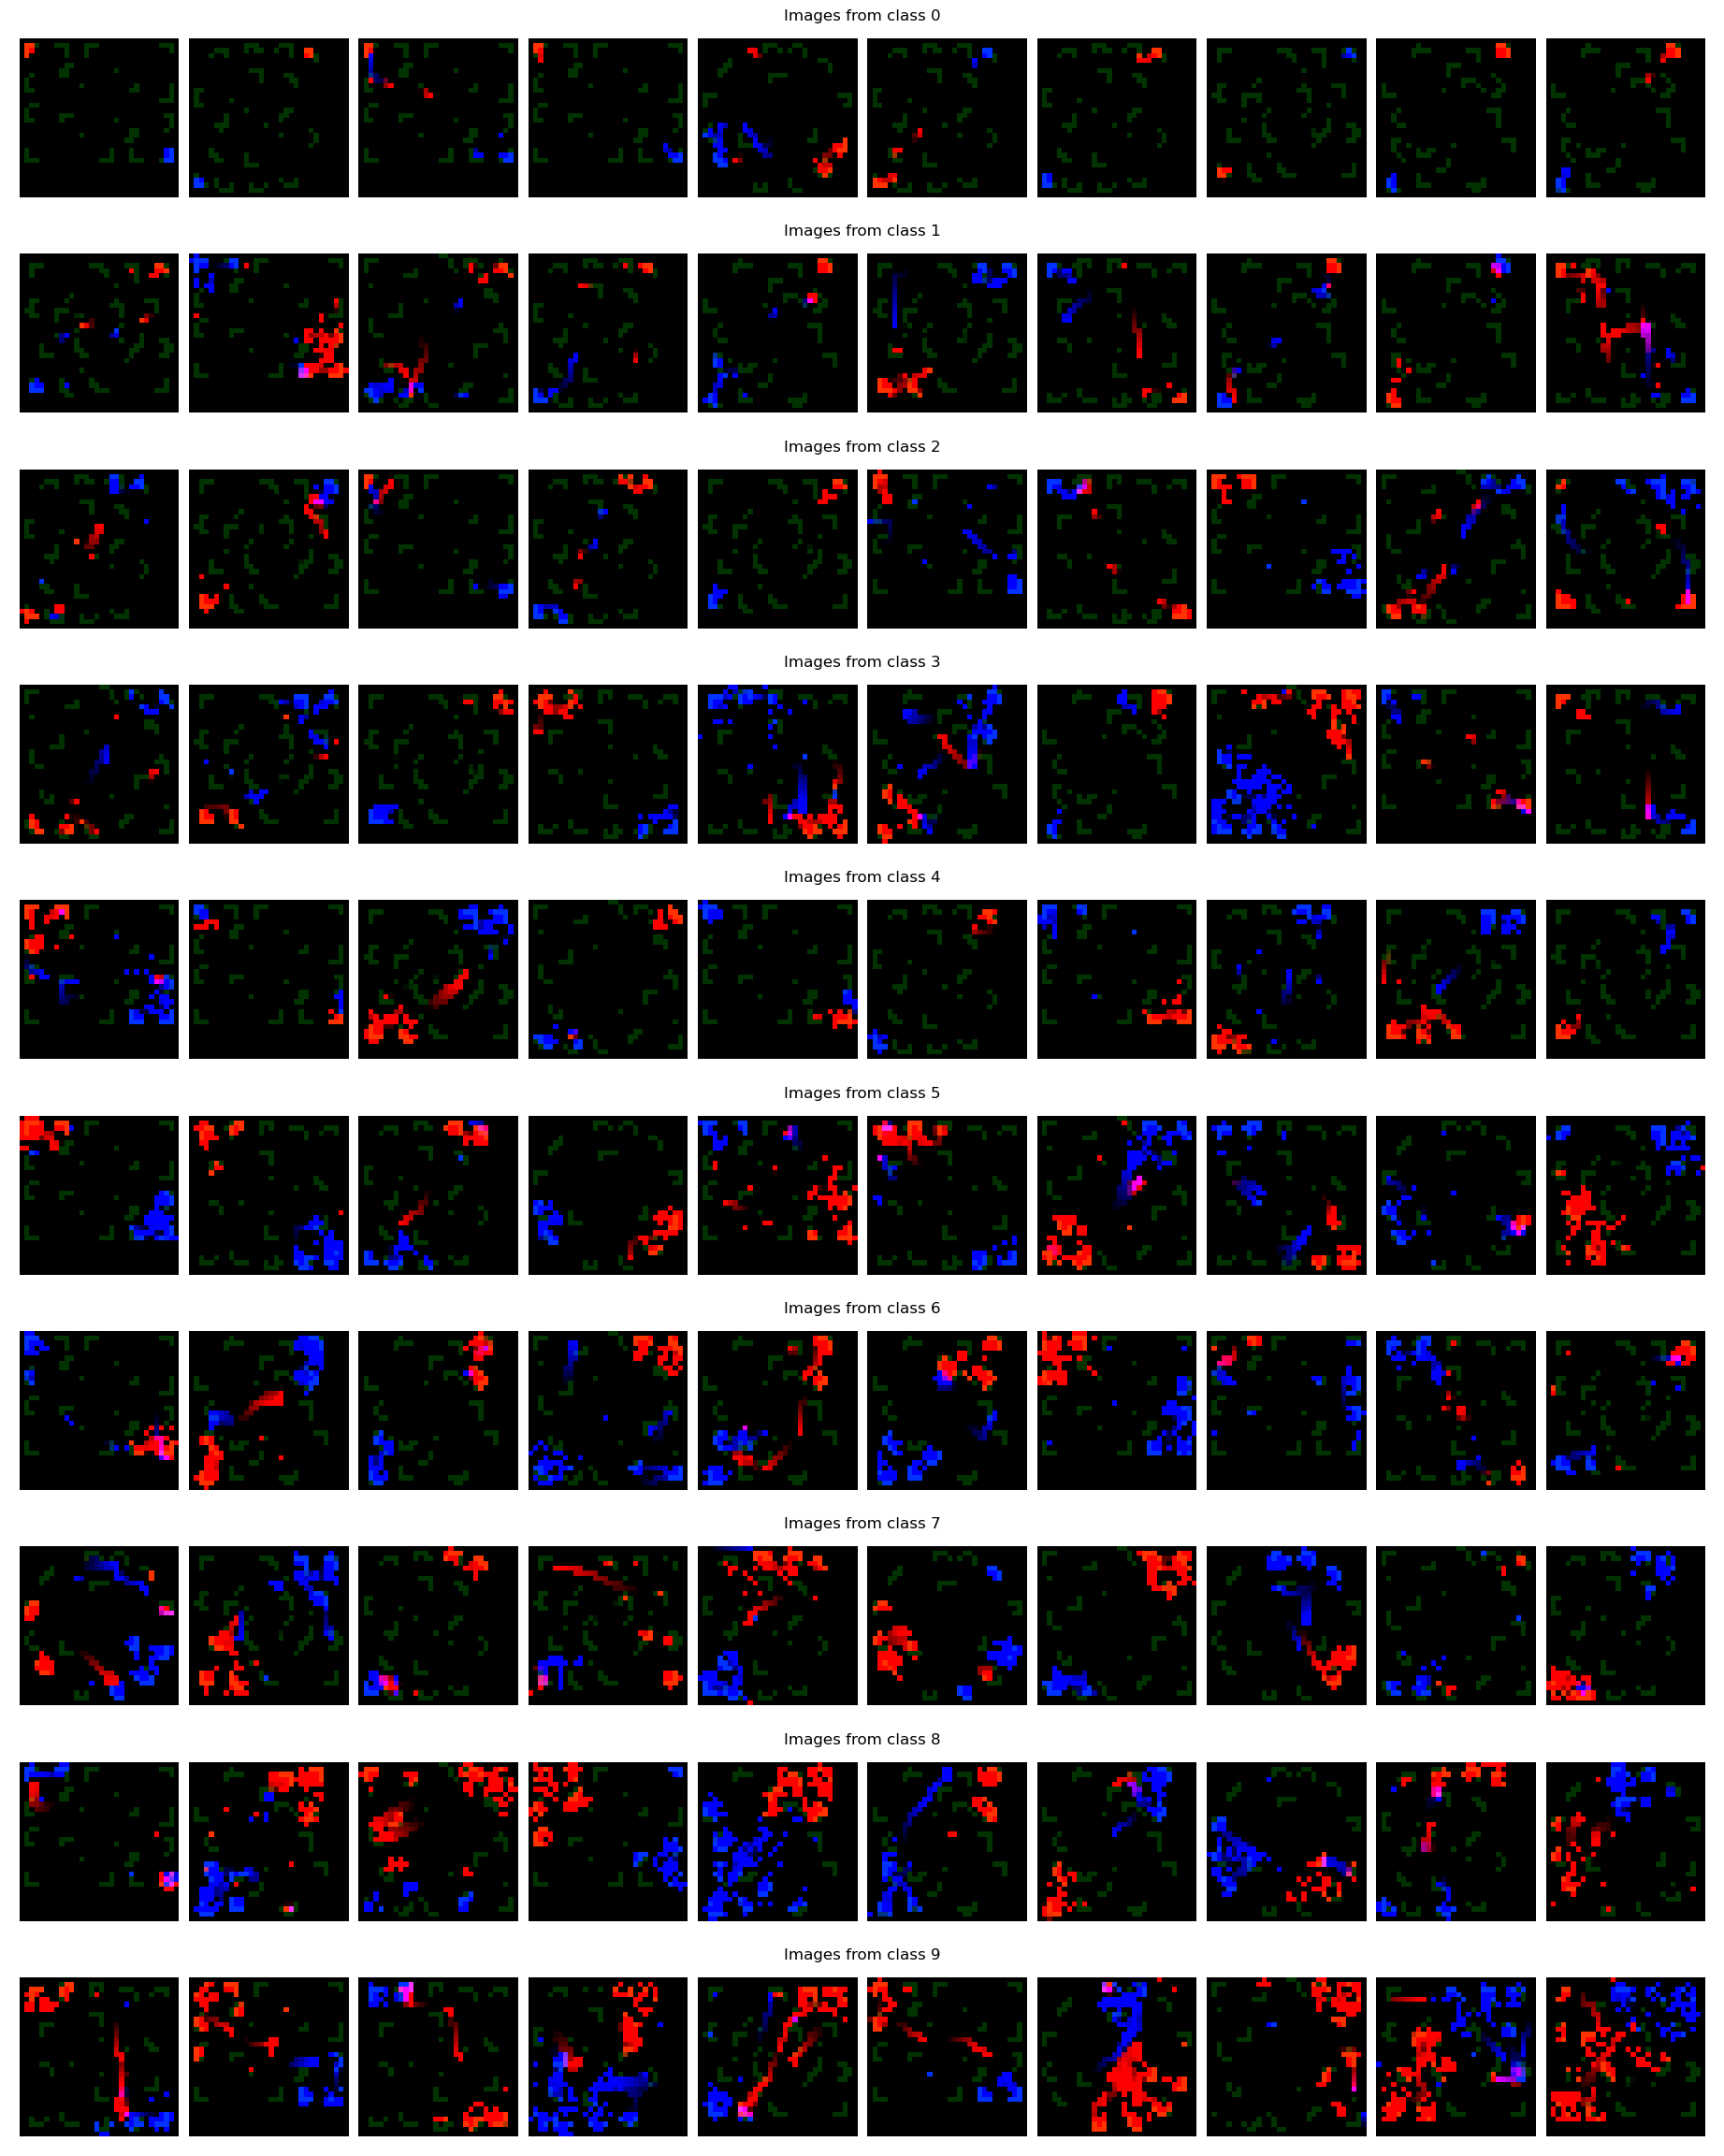

In [7]:
import matplotlib.pyplot as plt
n_classes = 10
n_show = 10 

dataloader = torch.utils.data.DataLoader(dataset, batch_size=n_show*n_classes*2, shuffle=False)
batch = next(iter(dataloader))

fig, axes = plt.subplots(n_classes, 1, figsize=np.array([n_show*6, n_classes*6])*0.5, dpi=100)
for yy, ax in enumerate(axes):
    im_grid = torchvision.utils.make_grid([x for x, y in zip(batch[0], batch[1]) if y==yy][:n_show], nrow=n_show, pad_value=1)
    imshow(im_grid, title=f'Images from class {yy}', ax=ax)
    ax.grid(False)
    ax.set_axis_off()